In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
import xgboost
from sklearn.metrics import explained_variance_score

In [154]:
df = pd.read_csv("data/Admission_Predict.csv",sep = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [155]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [156]:
print("There are",len(df.columns),"columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")

There are 9 columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

In [157]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df.drop(["Serial No."],axis=1,inplace = True)

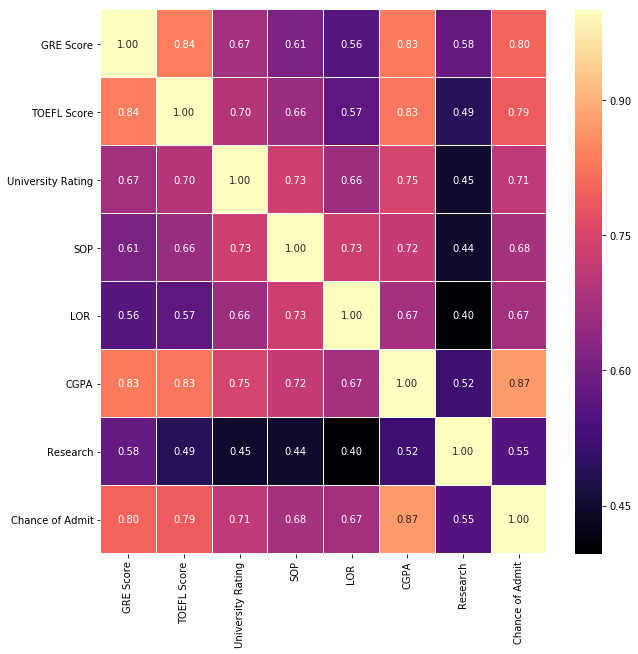

In [158]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
#sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
plt.show()

In [159]:
y = df["Chance of Admit"].values
#x_data = df.drop(["Chance of Admit"],axis=1)
#x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x = df.drop(["Chance of Admit"],axis=1)
x_data.head(10)
x.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [161]:
x_train.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
63,315,107,2,4.0,3.0,8.50,1
248,324,110,3,3.5,4.0,8.87,1
301,319,108,2,2.5,3.0,8.76,0
108,331,116,5,5.0,5.0,9.38,1
90,318,106,2,4.0,4.0,7.92,1


# xgboost的线性回归

In [162]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(xgb.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(xgb.predict(x_test.iloc[[2],:])))

print(explained_variance_score(predictions,y_test))
print(r2_score(predictions,y_test))

real value of y_test[1]: 0.68 -> the predict: [0.713917]
real value of y_test[2]: 0.9 -> the predict: [0.9426743]
0.743692209541011
0.7281972298306854


# sklearn的线性回归

In [163]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

real value of y_test[1]: 0.68 -> the predict: [0.72368741]
real value of y_test[2]: 0.9 -> the predict: [0.93536809]
r_square score:  0.8212082591486991
